In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

# 1- Load MNIST

In [2]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [4]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

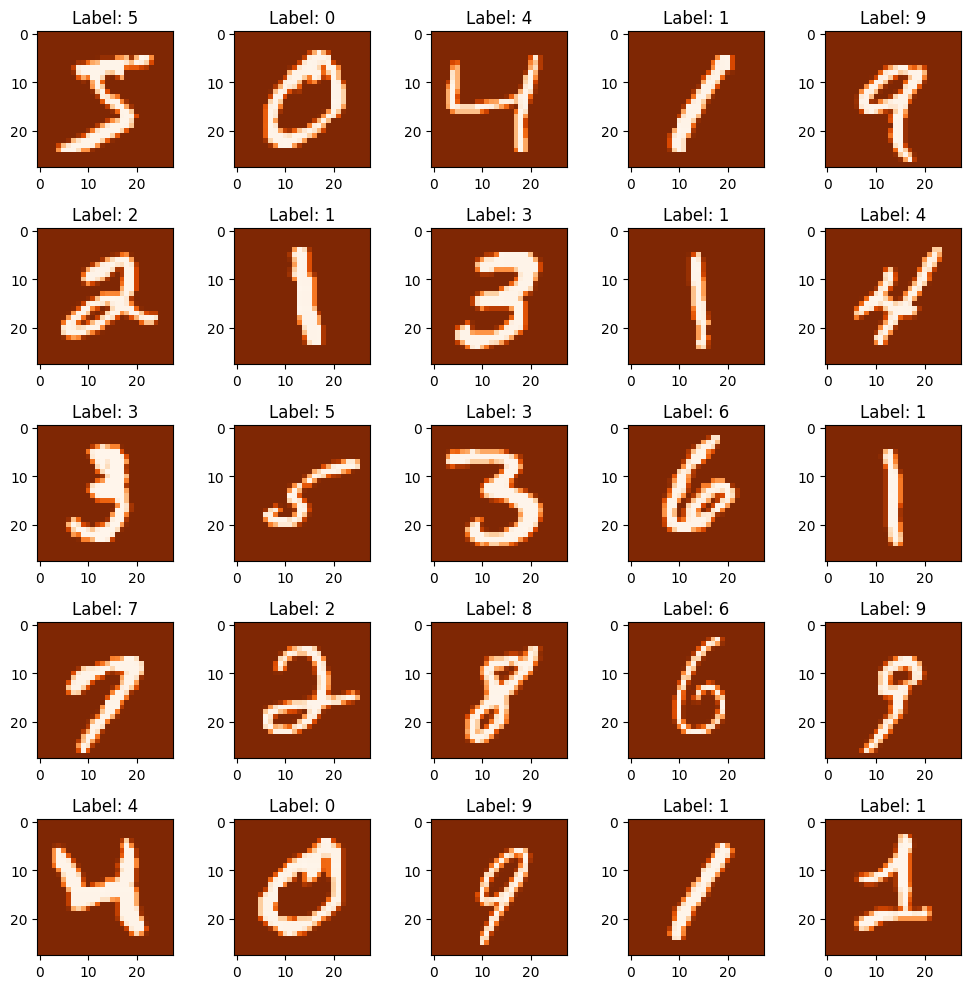

In [5]:
#Plot Figure
fig, axes = plt.subplots(nrows = 5 , ncols = 5 , figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
        ax.imshow(x_train[i], cmap='Oranges_r')
        ax.set_title(f"Label: {y_train[i]}")
plt.tight_layout()
plt.show()

In [6]:
# Shuffle the data
np.random.seed(42)
indices = np.random.permutation(len(x_train))
x_train = x_train[indices]
y_train = y_train[indices]

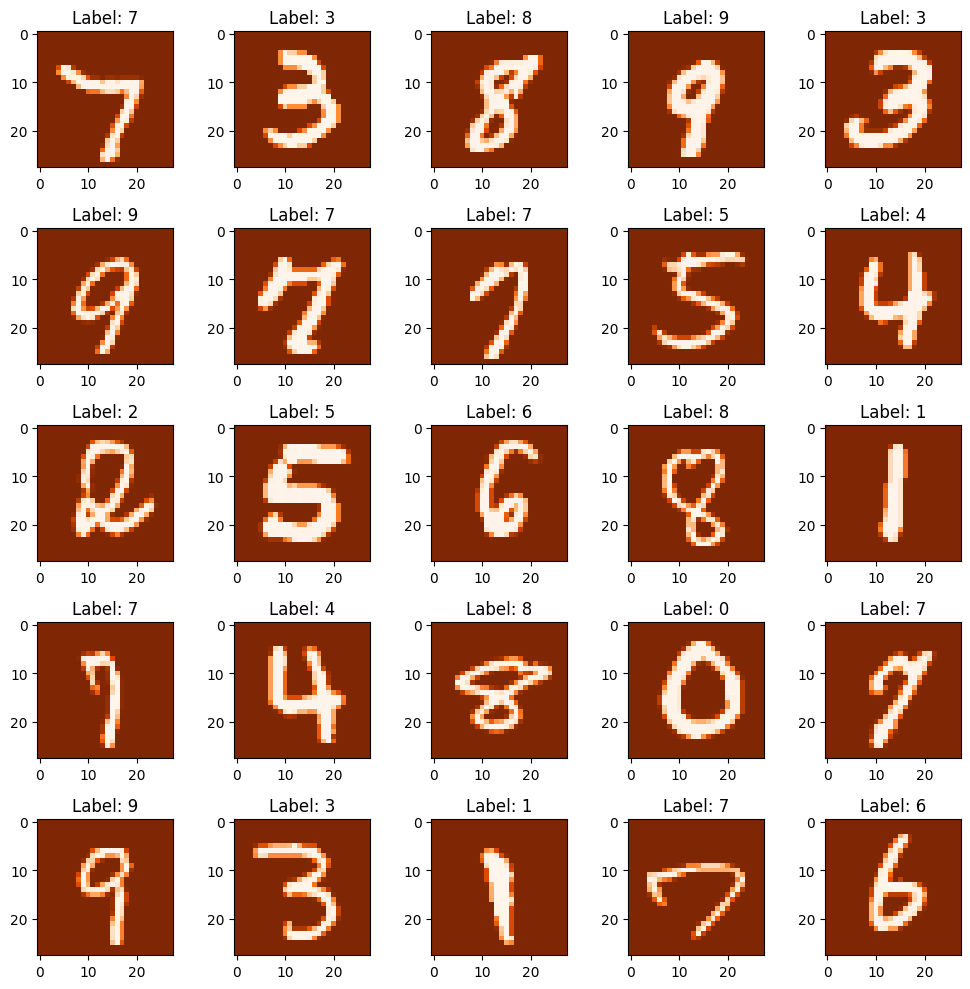

In [7]:
#Plot Figure
fig, axes = plt.subplots(nrows = 5 , ncols = 5 , figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
        ax.imshow(x_train[i], cmap='Oranges_r')
        ax.set_title(f"Label: {y_train[i]}")
plt.tight_layout()
plt.show()

In [8]:
y_train

array([7, 3, 8, ..., 0, 0, 4], dtype=uint8)

In [9]:
# Reshape the input data
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
X_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# Data Standardization

In [10]:
# Standardiza data to have 0 mean and unit variance
def Standardization(xtrain, xtest):
  # Standardization for x_train
  xtrain = (xtrain - xtrain.mean()) / xtrain.std()
  # Standardization for x_test
  xtest = (xtest - xtest.mean()) / xtest.std()
  return xtrain , xtest

In [11]:
x_train , x_test = Standardization(x_train , x_test)
print("X_train After Standardization is : " , x_train)

X_train After Standardization is :  [[-0.42407389 -0.42407389 -0.42407389 ... -0.42407389 -0.42407389
  -0.42407389]
 [-0.42407389 -0.42407389 -0.42407389 ... -0.42407389 -0.42407389
  -0.42407389]
 [-0.42407389 -0.42407389 -0.42407389 ... -0.42407389 -0.42407389
  -0.42407389]
 ...
 [-0.42407389 -0.42407389 -0.42407389 ... -0.42407389 -0.42407389
  -0.42407389]
 [-0.42407389 -0.42407389 -0.42407389 ... -0.42407389 -0.42407389
  -0.42407389]
 [-0.42407389 -0.42407389 -0.42407389 ... -0.42407389 -0.42407389
  -0.42407389]]


In [12]:
x_train.shape

(60000, 784)

# Sigmoid Activation Function

In [13]:
def sigmoid(z) :
  return 1 / (1 + np.exp(-z))

# Sigmoid Derivative Activation Function for Backpropagation

In [14]:
# Gradient of the sigmoid function
def sigmoid_derivative(z):
    sigmoid_z = sigmoid(z)
    return sigmoid_z * (1 - sigmoid_z)

# Calculate the Cost Function (MSE)

In [15]:
def calculate_cost(y , ypred) :
  return np.mean(np.power(y - ypred, 2))

# Apply one hot vector for labels

In [16]:
def one_hot(y, num_classes):
    ohs = np.zeros((y.shape[0], num_classes))
    for i, y in enumerate(y):
        ohs[i][y] = 1
    return ohs


# try one_hot function.

classes = 10

one_hot_vector_ytrain = one_hot(y_train , classes)
print("one_hot_vector on y_train"  , one_hot_vector_ytrain)

one_hot_vector_ytest = one_hot(y_test, classes)
print("one_hot_vector on y_test"  , one_hot_vector_ytest)

one_hot_vector on y_train [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
one_hot_vector on y_test [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Implementation of Neural Network Function

In [17]:
# Weights and biases initialization
def initialize_weights(layer_sizes):
    num_layers = len(layer_sizes)
    weights = [np.random.randn(layer_sizes[i-1], layer_sizes[i]).T for i in range(1, num_layers)]
    biases = [np.random.randn(layer_sizes[i], 1) for i in range(1, num_layers)]
    return weights, biases

In [18]:
# Initialization of Forwardpass to calculate cost and activation function 
def forward_pass(X, weights, biases):
    num_layers = len(weights) + 1
    activations = [X.T]
    for i in range(num_layers - 1) :
        z = np.dot(weights[i], activations[-1]) + biases[i]
        a = sigmoid(z)
        activations.append(a)
    return activations


In [19]:
def backpropagation(X, y, weights, biases, learning_rate):
    num_layers = len(weights) + 1
    activations = forward_pass(X, weights, biases)
    num_samples = X.shape[1]
    #print(activations[-1].shape)
    deltas = [None] * num_layers
    deltas[-1] = activations[-1]- y.T

    for i in range(num_layers - 2, 0, -1) :
        deltas[i] = np.dot(weights[i].T, deltas[i+1]) * sigmoid_derivative(activations[i])

    dW = [None] * (num_layers - 1)
    db = [None] * (num_layers - 1)

    for i in range(num_layers - 2, -1, -1):
        dW[i] = np.dot(deltas[i+1], activations[i].T) / num_samples
        db[i] = np.mean(deltas[i+1], axis=1, keepdims=True)

        weights[i] -= learning_rate * dW[i]
        biases[i] -= learning_rate * db[i]

    return weights, biases

In [20]:
def calculate_accuracy(predictions, targets):
    pred_labels = np.argmax(predictions, 0)
    true_labels = np.argmax(targets, 0)
    accuracy = np.mean(pred_labels == true_labels) * 100
    return accuracy

# Report for different Accuracies in Different cases

In [21]:
# One-hot encode the labels
num_classes = np.max(y_train) + 1
y_train_onehot = one_hot(y_train, num_classes)

X = x_train
y = y_train_onehot
y2=y_train
learning_rate = 0.0001

In [ ]:
# Neural Network with 2 layers one hidden and one output

layer_sizes = [784, 64 , 10]  
weights, biases = initialize_weights(layer_sizes)


for i in range (1000) :
  activations = forward_pass(X, weights, biases)
  
  loss = calculate_cost(activations[-1], y.T)
  weights, biases = backpropagation(X, y, weights, biases, learning_rate)
  accuracy = calculate_accuracy(activations[-1], y2)
 
print("Accuracy:", accuracy)

In [ ]:
# NN with 3 layers=> 2 hidden layers
# Where # of neurons in first layer < # of neurons in second layer and 1 output layer

layer_sizes = [784, 32, 64, 10]  
weights, biases = initialize_weights(layer_sizes)


for i in range (1000) :
  activations = forward_pass(X, weights, biases)
  
  loss = calculate_cost(activations[-1], y.T)
  weights, biases = backpropagation(X, y, weights, biases, learning_rate)
  accuracy = calculate_accuracy(activations[-1], y2)
 
print("Accuracy:", accuracy)

In [ ]:
# NN with 3 layers=> 2 hidden layers
# Where # of neurons in first layer > # of neurons in second layer and 1 output layer

layer_sizes = [784, 64, 32, 10]  # Example layer sizes for MNIST dataset
weights, biases = initialize_weights(layer_sizes)


for i in range (1000) :
  activations = forward_pass(X, weights, biases)
  
  loss = calculate_cost(activations[-1], y.T)
  weights, biases = backpropagation(X, y, weights, biases, learning_rate)
  accuracy = calculate_accuracy(activations[-1], y2)
 
print("Accuracy:", accuracy)